In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Ten real-valued features are computed for each cell nucleus:<br>

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>
<br>
The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

In [4]:
# Checking shape

df.shape

(569, 33)

In [5]:
# Checking Datatypes

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
#checking description of data

df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
# checking null values

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# columns

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
#dropping ID and unnamed column

df.drop(['Unnamed: 32','id'],axis = 1, inplace = True)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# Diagnosis Column

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

We don't have any null values, so now we will go to EDA

In [13]:
# correlation
# Printing the list of highly correlated variables(corr>0.9)

corr = df.corr()
lst = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for i in range(0,len(lst)):
    for j in range(0,i):
        if corr[lst[i]][lst[j]]>0.9 and lst[i]!=lst[j]:
            c = corr[lst[i]][lst[j]]
            print(f'The correlation between {lst[i]} and {lst[j]} is {c}')

The correlation between perimeter_mean and radius_mean is 0.9978552814938109
The correlation between area_mean and radius_mean is 0.9873571700566127
The correlation between area_mean and perimeter_mean is 0.9865068039913907
The correlation between concave points_mean and concavity_mean is 0.9213910263788588
The correlation between perimeter_se and radius_se is 0.9727936770160764
The correlation between area_se and radius_se is 0.951830112110991
The correlation between area_se and perimeter_se is 0.9376554069544157
The correlation between radius_worst and radius_mean is 0.9695389726112055
The correlation between radius_worst and perimeter_mean is 0.9694763634663146
The correlation between radius_worst and area_mean is 0.9627460860470841
The correlation between texture_worst and texture_mean is 0.912044588840421
The correlation between perimeter_worst and radius_mean is 0.9651365139559871
The correlation between perimeter_worst and perimeter_mean is 0.9703868870426394
The correlation bet

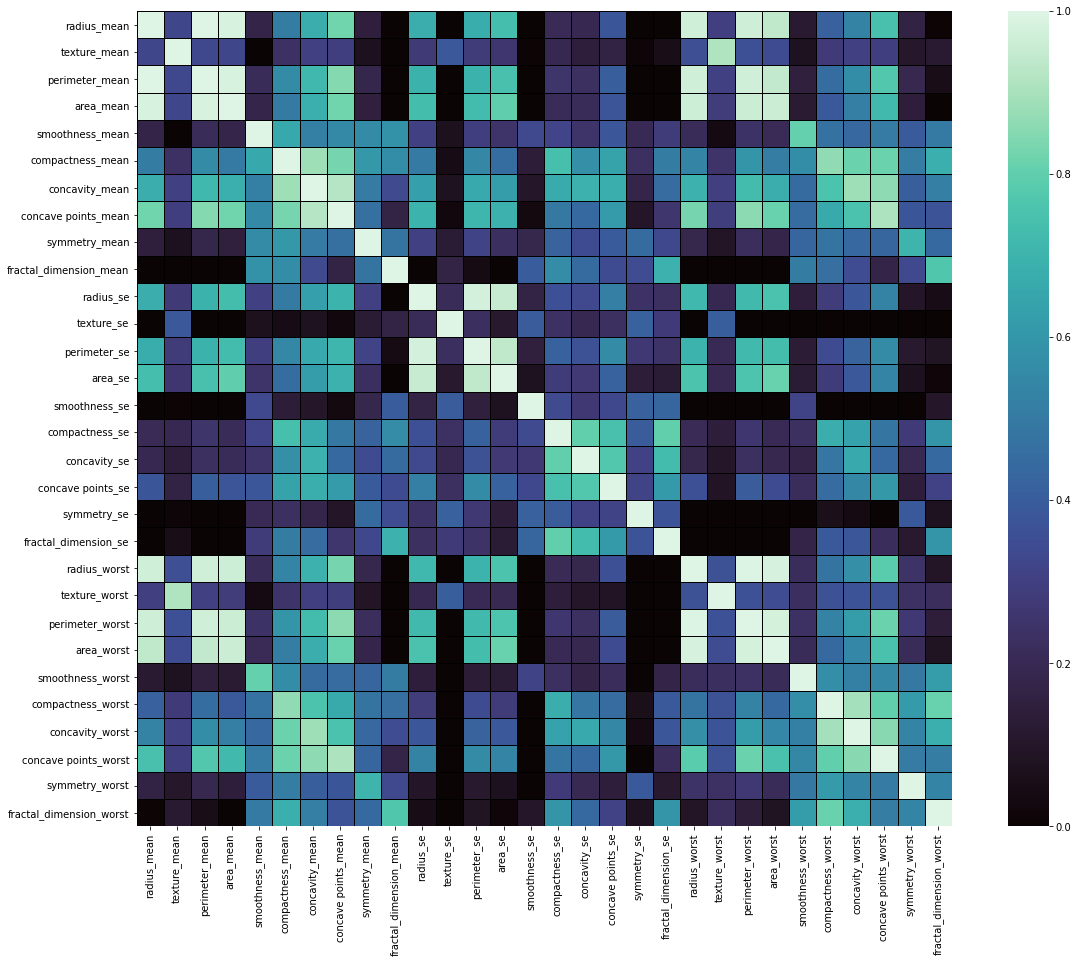

In [14]:
# Heatmap for correlation

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), cmap = 'mako',vmin = 0,vmax = 1, #annot = True, 
            linewidth = 1,linecolor = 'black',square = True)
plt.show()

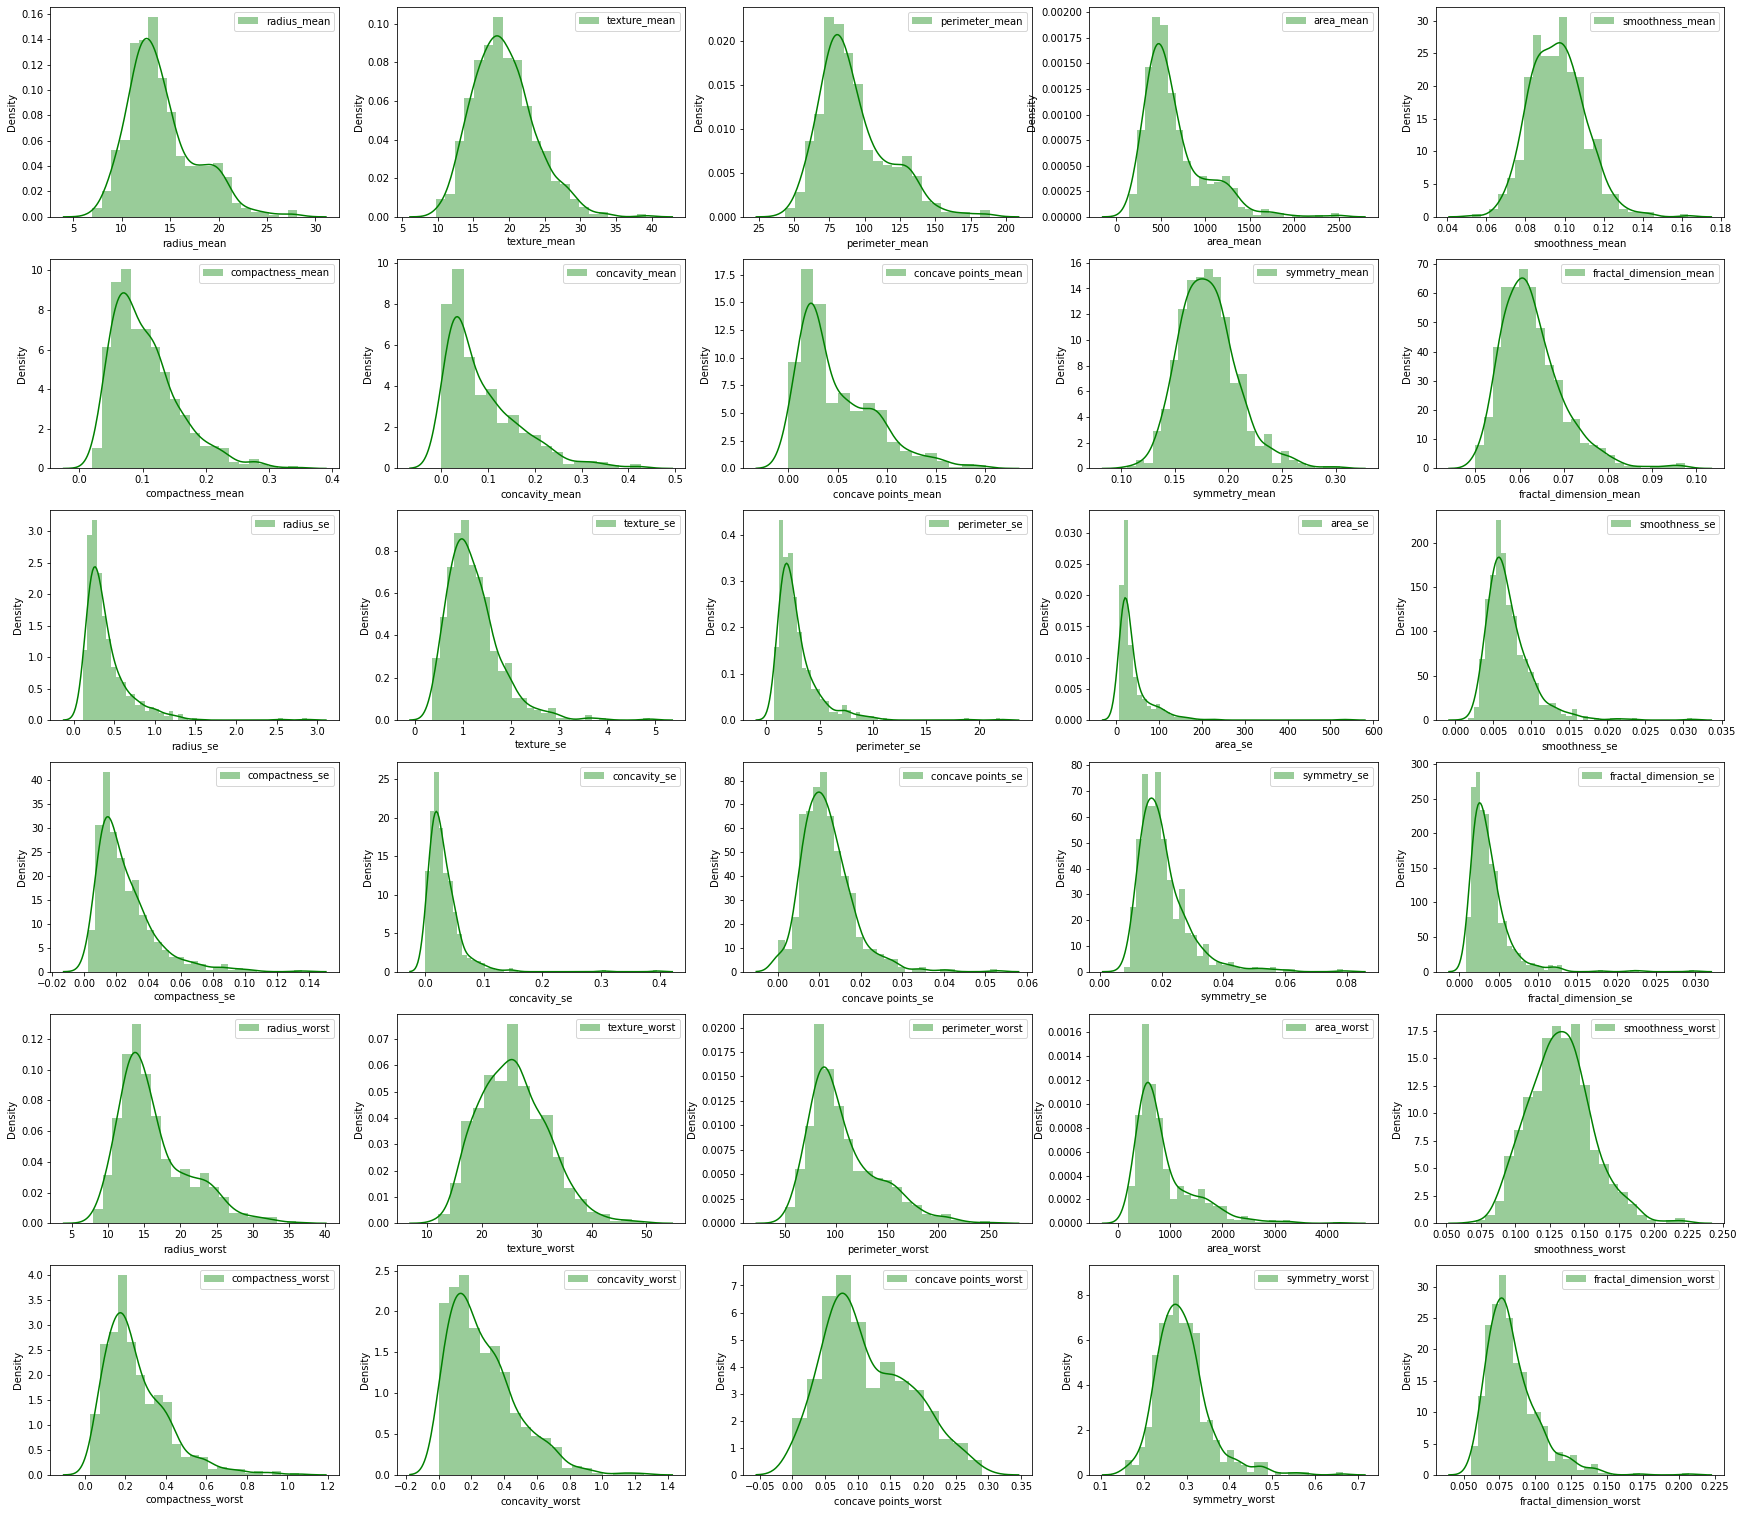

In [15]:
# seeing individual distributions

var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

plt.figure(figsize = (30,27))
a,b,c = 6,5,1
for i in var:
    plt.subplot(a, b, c)
    sns.distplot(df[i], color = 'green',label = i)
    plt.legend()
    c=c+1
plt.show()

Mostly, data is normally distributed and positively skewed

No handles with labels found to put in legend.


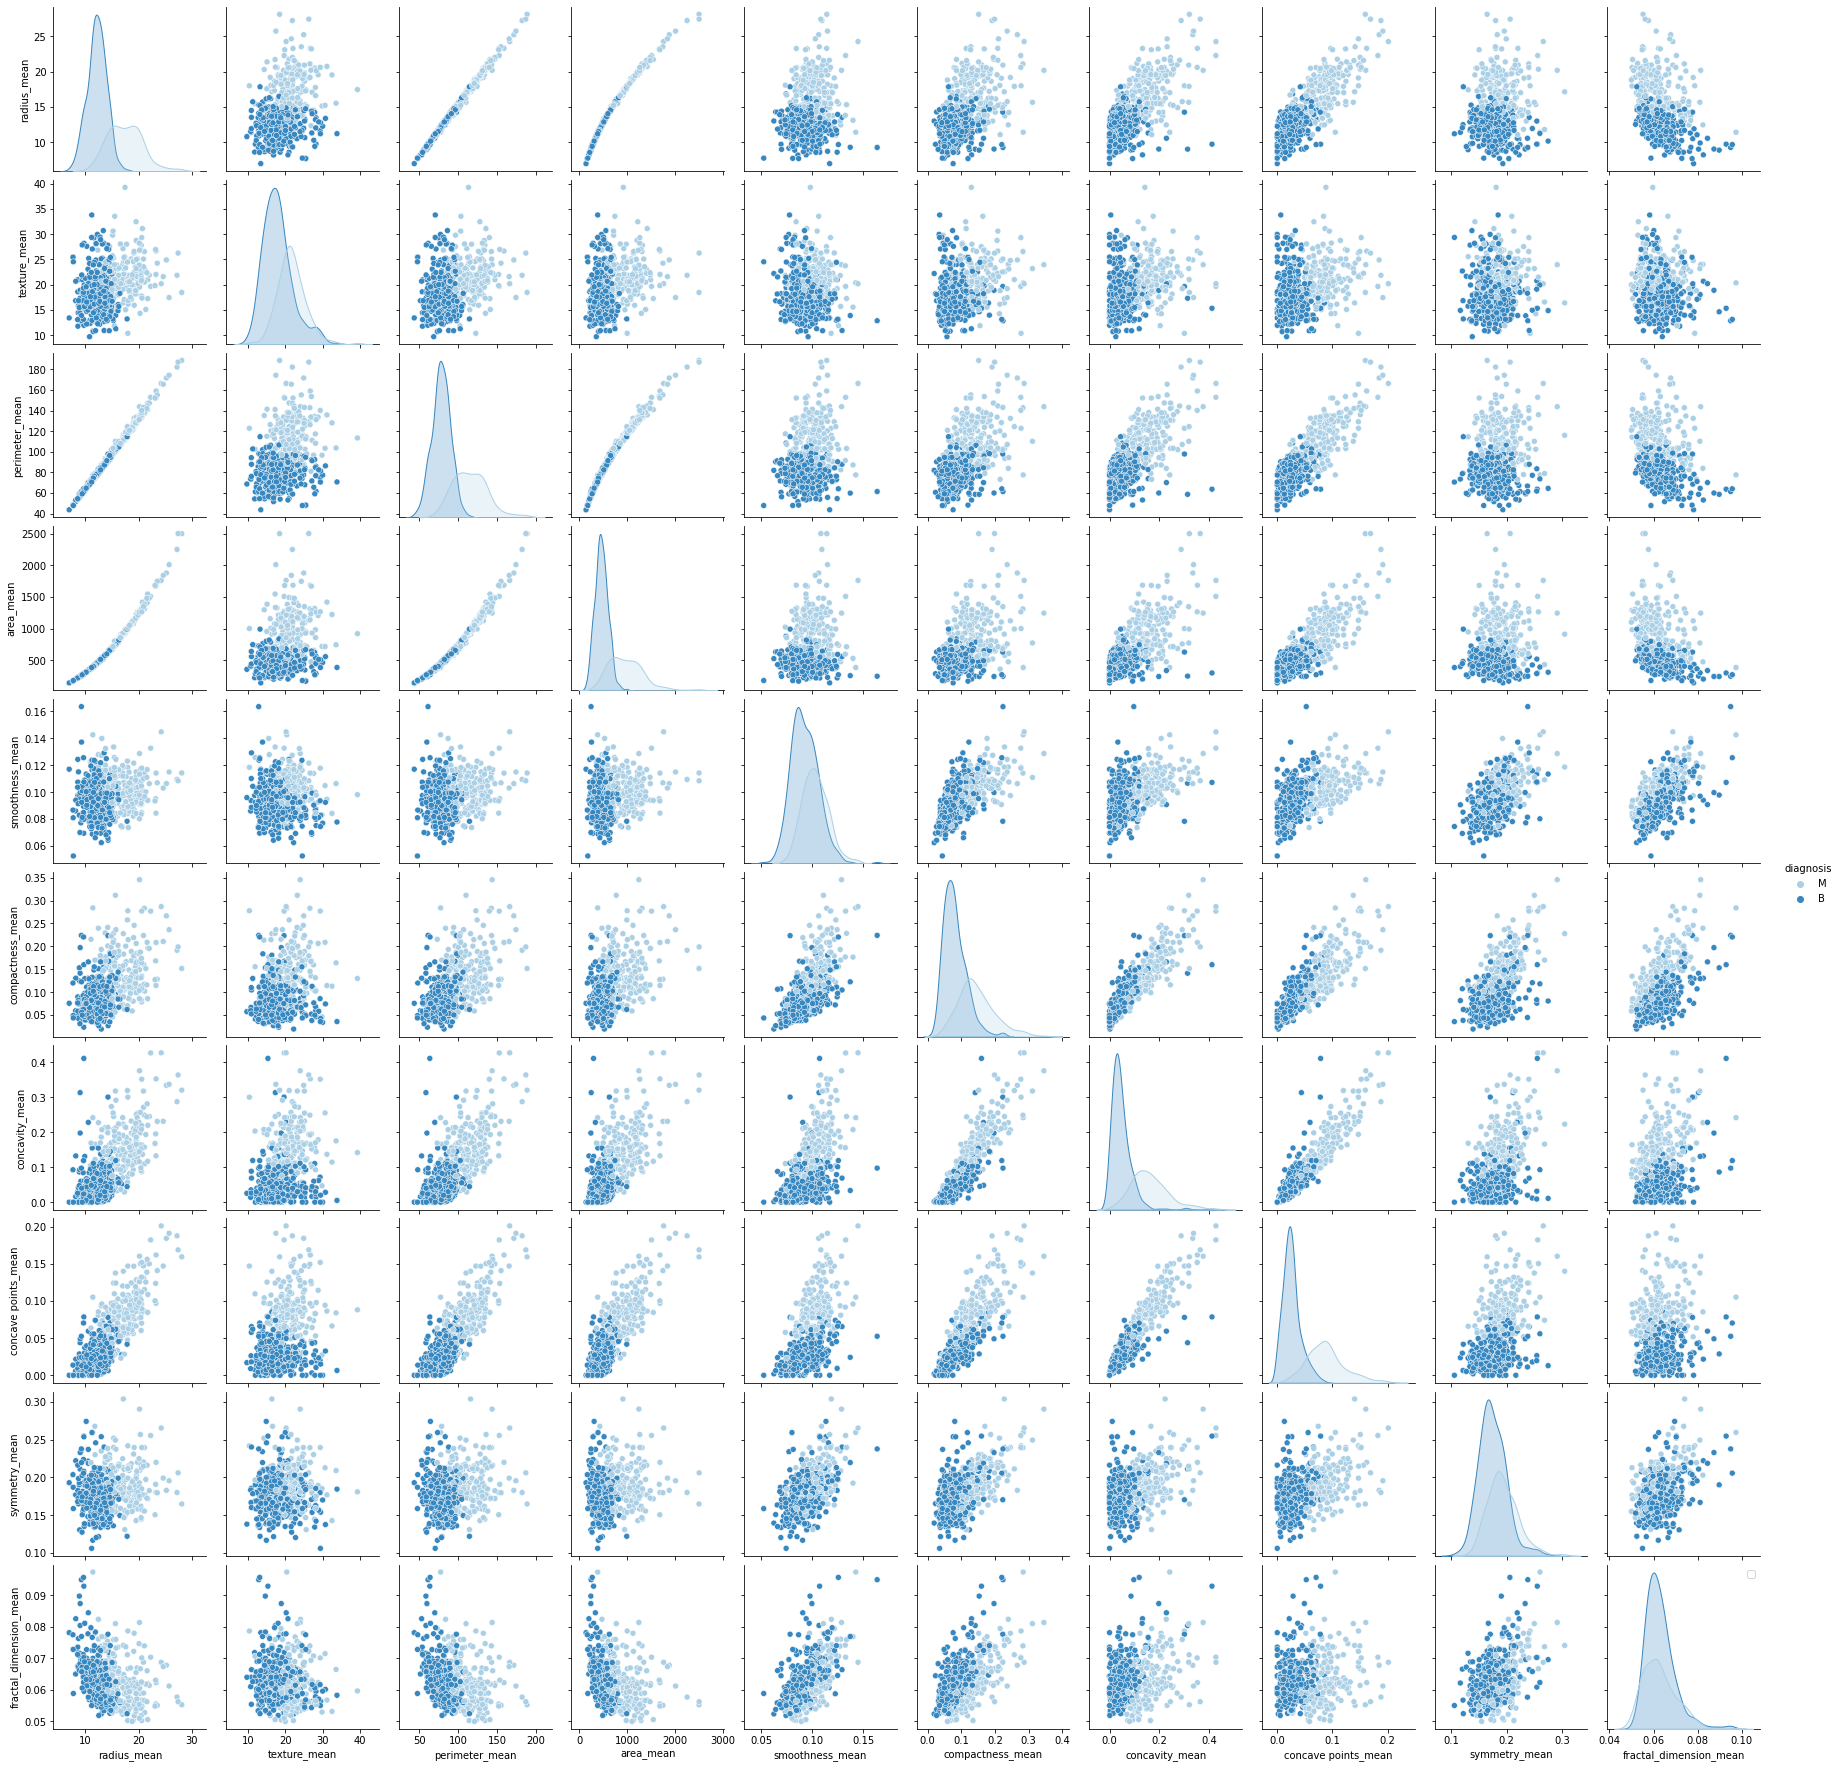

In [16]:
# Bivariate

mean_data = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(df[mean_data],hue = 'diagnosis', palette='Blues')
plt.legend()

We can see that radius mean, perimeter mean, area mean have a linear relationship. Also, generally values are tending to be malignant towards the higher end of the graph.

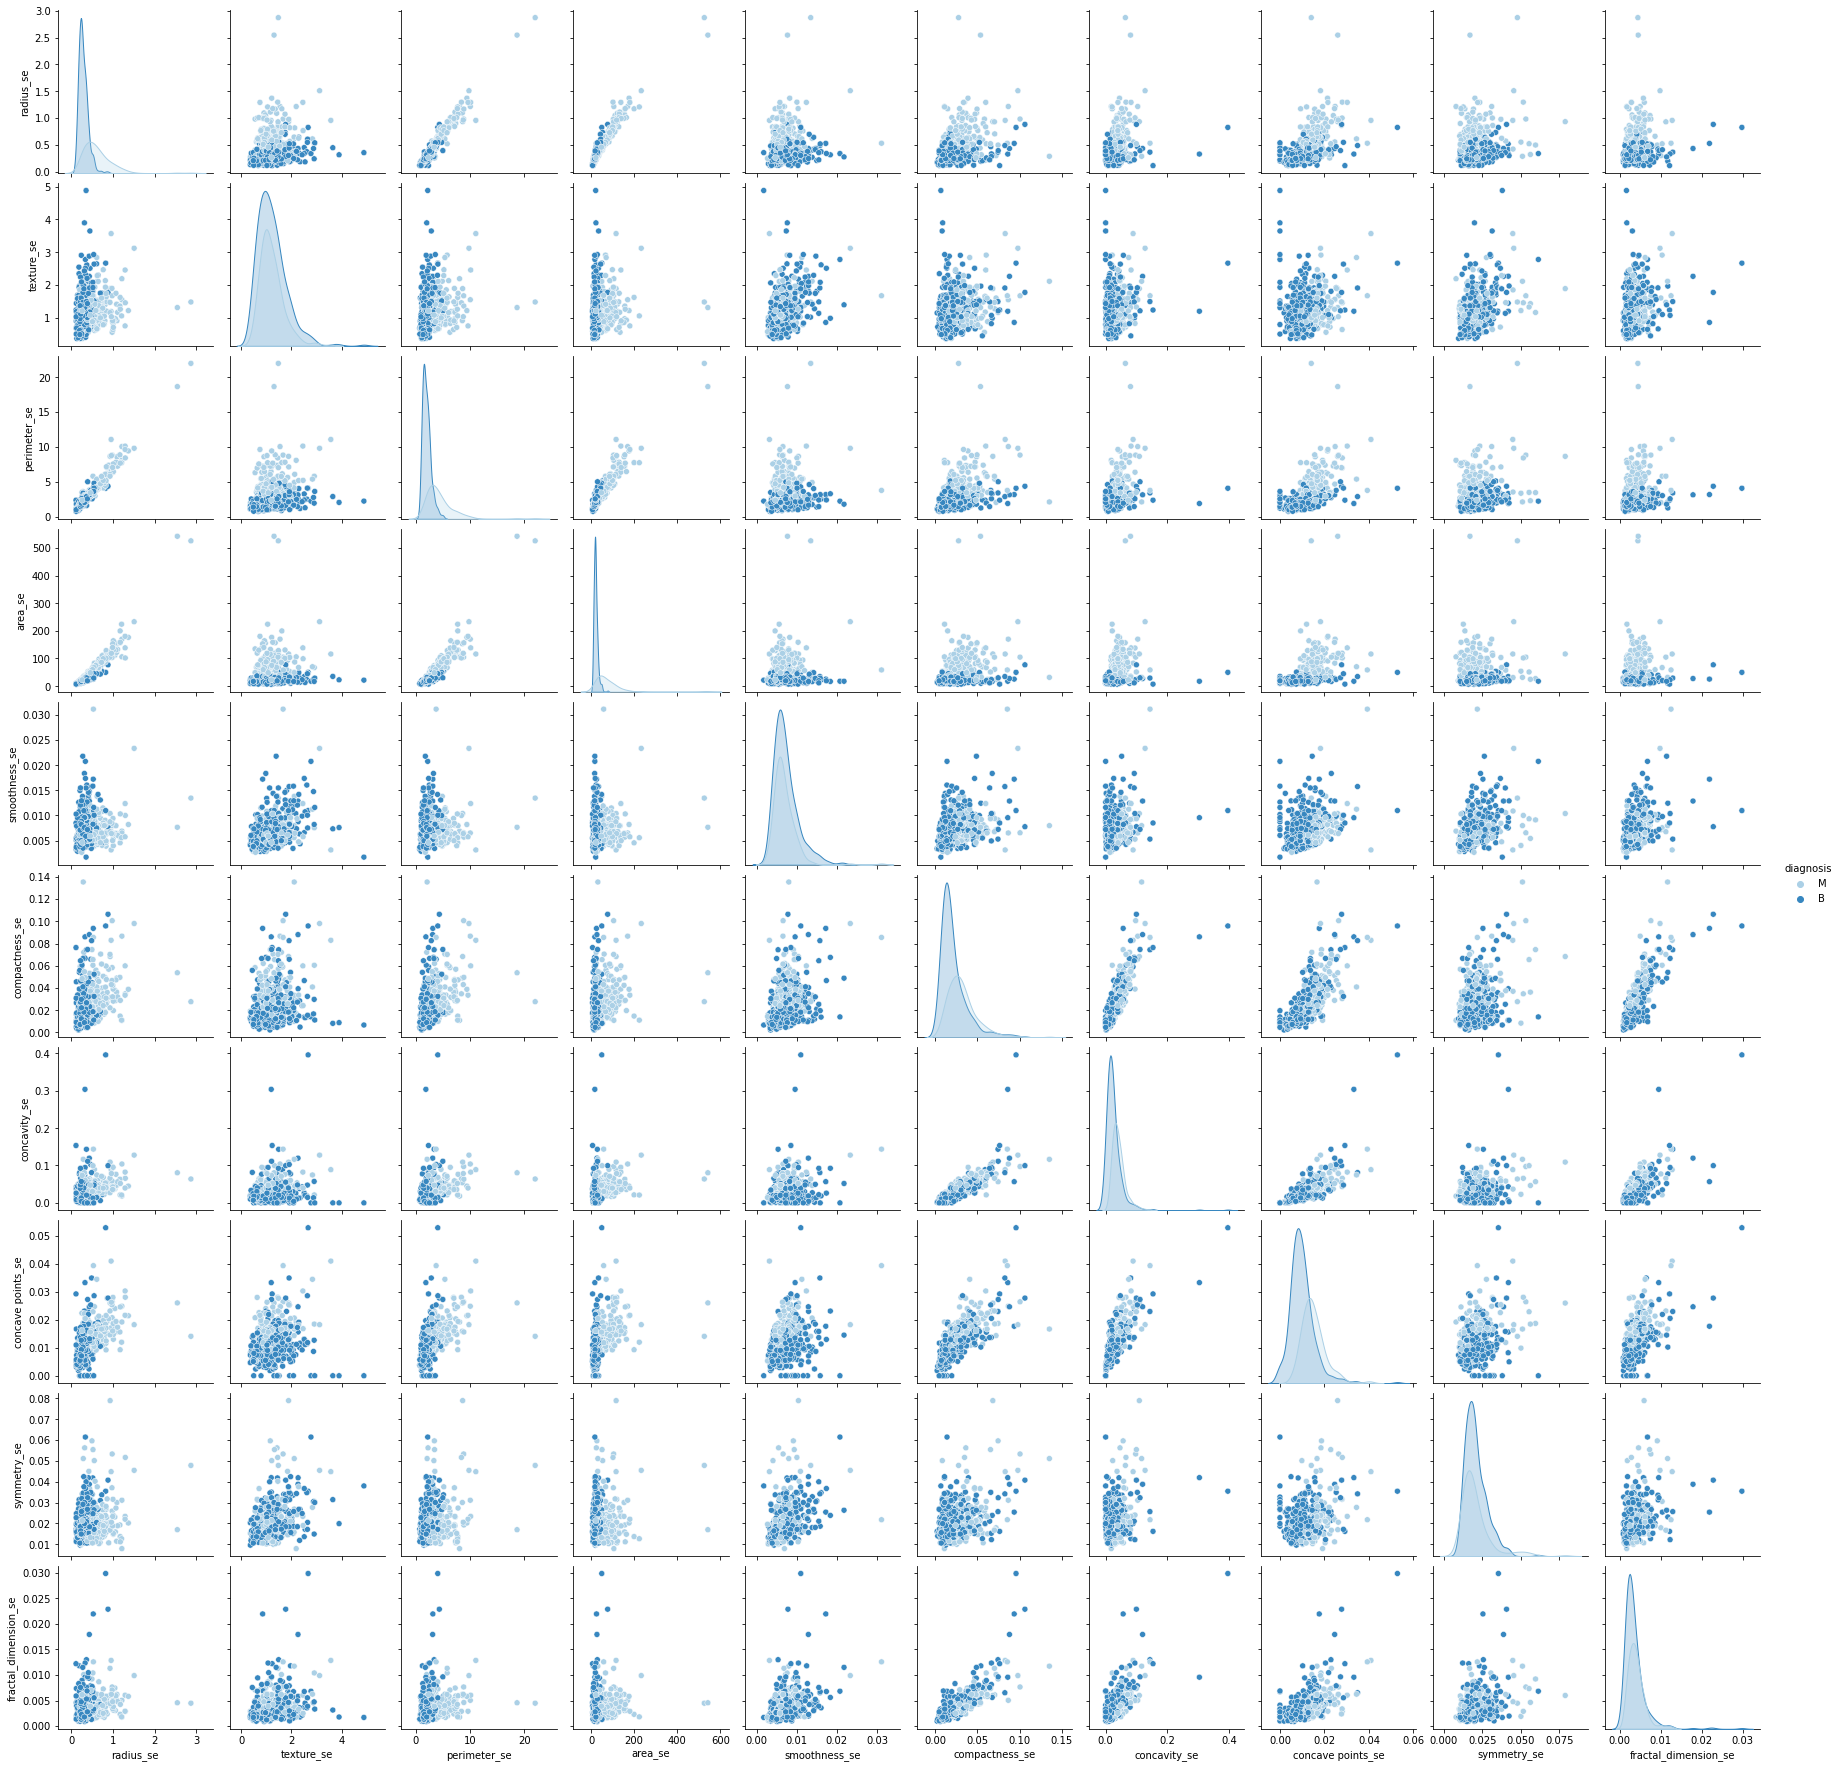

In [17]:
# Similarly, we will make pairplots for se and worst values

se_data = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

sns.pairplot(df[se_data],hue = 'diagnosis', palette='Blues')

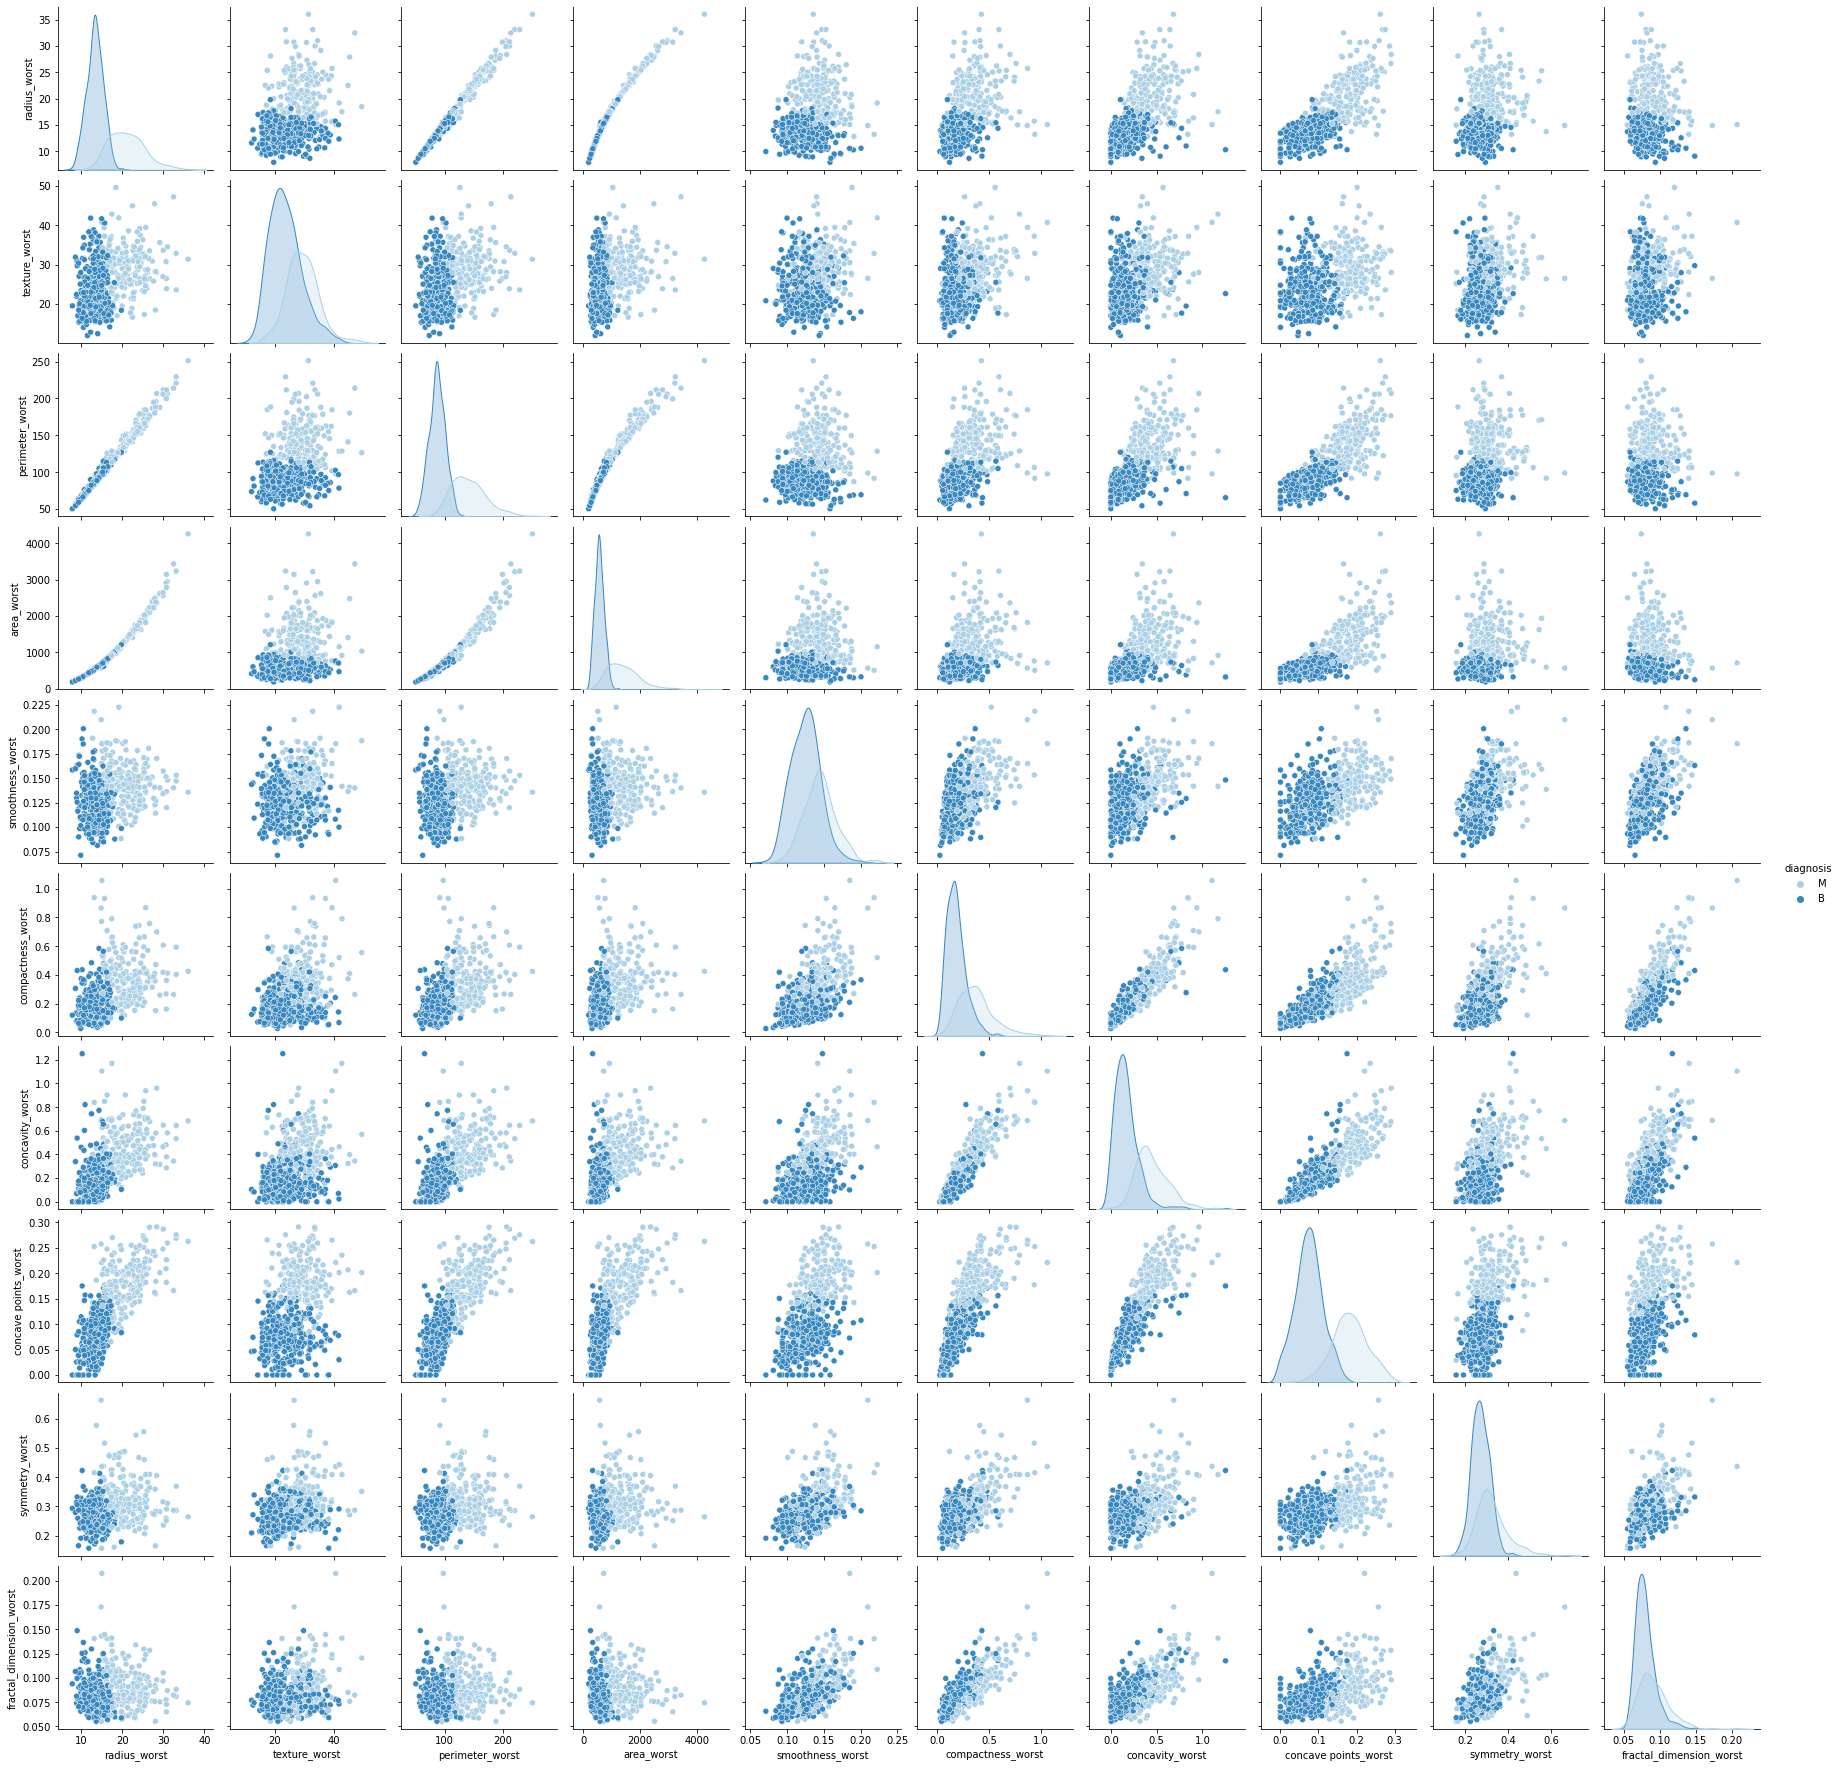

In [18]:
worst_data = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(df[worst_data], hue = 'diagnosis', palette = 'Blues')

In [19]:
# Predictive Analysis

X = df.iloc[:,1:]

In [20]:
# Encoding Catagorical Target Variable

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(df.diagnosis)


In [21]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
#Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [24]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train)

In [26]:
X_train.columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

[04:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Feature Importances :  [0.00240394 0.017051   0.         0.

<Figure size 1080x864 with 0 Axes>

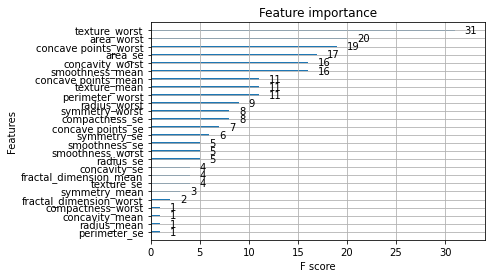

In [27]:
# FEATURE SELECTION


#!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

plt.figure(figsize = (15,12))
# fit model to training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print(X_train.columns)
print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [28]:
X_test = pd.DataFrame(X_test)

In [29]:
X_test.columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [30]:
X_train = X_train[['texture_worst','area_worst','concave points_worst','area_se','concavity_worst','smoothness_mean',
                  'concave points_mean','texture_mean','perimeter_worst']]


In [31]:
X_test = X_test[['texture_worst','area_worst','concave points_worst','area_se','concavity_worst','smoothness_mean',
                  'concave points_mean','texture_mean','perimeter_worst']]

In [32]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)
pred_log_res = log_reg_model.predict(X_test)

In [33]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
pred_KNN = KNN_model.predict(X_test)

In [34]:
# Using Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTree_model = DecisionTreeClassifier()
DTree_model.fit(X_train,y_train)
pred_DTree = DTree_model.predict(X_test)

In [35]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
pred_RF = RF_model.predict(X_test)

In [36]:
# Using SVM

from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
pred_SVC = SVC_model.predict(X_test)

In [37]:
# Using Boosting Techniques

from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
pred_ada = ada_model.predict(X_test)

In [38]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

# Checking Accuracy for all models

estimator = [log_reg_model,KNN_model,DTree_model,RF_model,SVC_model,ada_model]
preds = [pred_log_res,pred_KNN,pred_DTree,pred_RF,pred_SVC,pred_ada]
for i in range(0,len(preds)):
    print(f'The metrics for {estimator[i]} are: \n')
    confmat = confusion_matrix(y_test, preds[i]) 
    print(f'The confusion metrics :\n {confmat} \n')
    accuracies = cross_val_score(estimator = estimator[i], X = X_train, y = y_train, cv = 10)
    print(f'The accuracies :{accuracies} \n')
    roc = roc_auc_score(y_test, preds[i]) 
    print(f'ROC Score: {roc} \n')
    precision = precision_score(y_test, preds[i])
    print(f'Precision: {precision} \n')
    recall = recall_score(y_test, preds[i]) 
    print(f'Recall Score: {recall} \n')
    f1 = f1_score(y_test, preds[i])
    print(f'f1 score: {f1} \n')

The metrics for LogisticRegression() are: 

The confusion metrics :
 [[87  1]
 [ 3 52]] 

The accuracies :[1.         0.95348837 0.93023256 0.95348837 1.         0.93023256
 1.         0.97619048 1.         0.97619048] 

ROC Score: 0.9670454545454544 

Precision: 0.9811320754716981 

Recall Score: 0.9454545454545454 

f1 score: 0.9629629629629629 

The metrics for KNeighborsClassifier() are: 

The confusion metrics :
 [[83  5]
 [ 5 50]] 

The accuracies :[0.95348837 0.97674419 0.93023256 0.97674419 1.         0.93023256
 0.97619048 1.         1.         0.95238095] 

ROC Score: 0.9261363636363638 

Precision: 0.9090909090909091 

Recall Score: 0.9090909090909091 

f1 score: 0.9090909090909091 

The metrics for DecisionTreeClassifier() are: 

The confusion metrics :
 [[85  3]
 [ 4 51]] 

The accuracies :[0.93023256 0.97674419 0.90697674 0.93023256 0.93023256 0.93023256
 0.95238095 0.97619048 0.95238095 0.95238095] 

ROC Score: 0.946590909090909 

Precision: 0.9444444444444444 

Recall S

In [39]:
# grid search

from sklearn.model_selection import GridSearchCV

parameters_lin = [{
    'penalty': ['l1', 'l2', ],
    'solver': ['newton-cg', 'liblinear', ],
    'C': np.logspace(-4, 4, 5),
    }]
parameters_knn = [{
    'n_neighbors': list(range(0, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    }]
parameters_dt = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,  6,  8,  10,  12,  20,  40, 70],
    }]
parameters_rfc = [{
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_features': [2, 3],
    }]
parameters_svm= [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9, 1],
        'C': np.logspace(-4, 4, 5)},
    ]
parameters_ada={
            'learning_rate': [0.005, 0.01],
            'n_estimators': [8,16,24],
    }
models =[("LR", LogisticRegression(), parameters_lin),('KNN',KNeighborsClassifier(),parameters_knn),
    ("DTC", DecisionTreeClassifier(),parameters_dt),('RF',RandomForestClassifier(),parameters_rfc),("SVC", SVC(),parameters_svm),
    ('ADA',AdaBoostClassifier(),parameters_ada)]
f1_score_list = []    
for name, model, param in models:
    print(name,end = '\n')
    grid_search = GridSearchCV(estimator = model,
                               param_grid = param,
                               scoring = 'f1',
                               cv = 5,
                               n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_f1 = grid_search.best_score_
    best_parameters = grid_search.best_params_
    f1_score_list.append(best_f1*100)
    print("Best F1: {:.2f} %".format(best_f1*100))
    print("Best Parameters:", best_parameters)
    print(end = '\n \n')

LR
Best F1: 95.84 %
Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

 
KNN
Best F1: 96.79 %
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

 
DTC
Best F1: 94.31 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 70, 'splitter': 'random'}

 
RF
Best F1: 94.60 %
Best Parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 1000}

 
SVC
Best F1: 97.18 %
Best Parameters: {'C': 1.0, 'gamma': 0.5, 'kernel': 'rbf'}

 
ADA
Best F1: 90.68 %
Best Parameters: {'learning_rate': 0.005, 'n_estimators': 8}

 


In [40]:
params = ['LR','KNN','DTC','RF','SVC','ADA']


In [41]:
# Accuracy
accuracy_list = []
for name, model, param in models:
    print(name,end = '\n')
    grid_search = GridSearchCV(estimator = model,
                               param_grid = param,
                               scoring = 'accuracy',
                               cv = 5,
                               n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    accuracy_list.append(best_accuracy*100)
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
    print("Best Parameters:", best_parameters)
    print(end = '\n \n')

LR
Best Accuracy: 96.95 %
Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

 
KNN
Best Accuracy: 97.65 %
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

 
DTC
Best Accuracy: 95.54 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

 
RF
Best Accuracy: 96.48 %
Best Parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 100}

 
SVC
Best Accuracy: 97.89 %
Best Parameters: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

 
ADA
Best Accuracy: 92.74 %
Best Parameters: {'learning_rate': 0.005, 'n_estimators': 8}

 


In [42]:
summ_df = pd.DataFrame(list(zip(params,accuracy_list,f1_score_list)),
               columns =['Params', 'Accuracy','F1_Score'])

In [43]:
summ_df.sort_values(by= ['F1_Score','Accuracy'], inplace= True, ascending= False)

In [44]:
summ_df

Params   Accuracy   F1_Score
4    SVC  97.887825  97.180648
1    KNN  97.649795  96.791514
0     LR  96.949384  95.836471
3     RF  96.481532  94.596326
2    DTC  95.543092  94.311013
5    ADA  92.738714  90.679099

<Figure size 432x288 with 0 Axes>

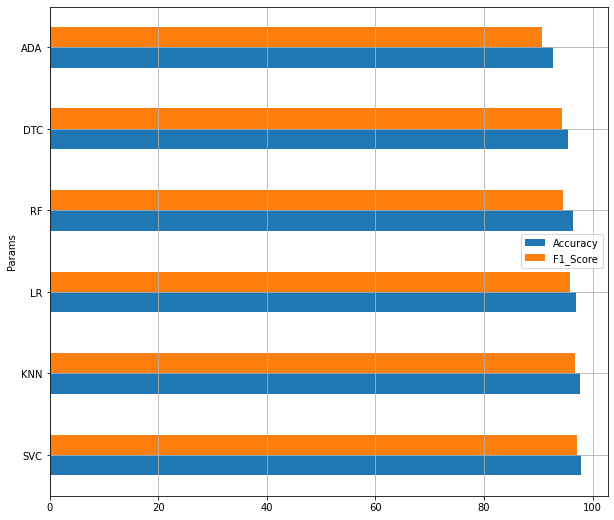

In [45]:
plt.figure()
summ_df.plot.barh(x='Params', y={'F1_Score', 'Accuracy'},figsize=(10,9))
plt.xticks(rotation = 0)    
plt.grid()
plt.show()

SVC gives best accuracy and F-Score